The task: I am an Executive Director Medical Services of Hospital A (denoted in Col A in PCOR File.xlsx) and our hospital has been contributing to Prostate Cancer Outcomes Registry (PCOR) since 2016. Please provide me with the completeness of PSA assessment (denoted in Col C in PCOR File.xlsx) at diagnosis (denoted in Col B in PCOR File.xlsx) in my hospital compared to others? Please display this indicator (PSA assessment completed and documented at diagnosis) in my hospital over time.

The screening effect of prostate cancer is not clear. Prostate specific antigen (PSA) testing increases cancer detection rates without reducing mortality. Because most diagnosed prostate cancers are asymptomatic, the USPSTF does not recommend PSA testing to prevent overdiagnosis and overtreatment.(retrieved from https://web.archive.org/web/20120601084819/http://www.uspreventiveservicestaskforce.org/prostatecancerscreening/prostatecancerscript.pdf)

In [1]:
library(ggplot2)
library('lubridate')


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



reformat the xlsx file to csv and read the PCOR File.csv 

In [2]:
data = read.csv("PCOR File.csv")

In [3]:
head(data)

Hospital,Dateofdiagnosis,Indicator_X
A,6/01/2016,1
A,13/01/2016,1
A,13/01/2016,1
A,17/01/2016,0
A,22/01/2016,1
A,18/02/2016,0


from the raw data, we know that these data is about the hospital,the date and completing PSA assessment or not.

In [5]:
data$Dateofdiagnosis = as.Date(data$Dateofdiagnosis,'%d/%m/%Y')
day = day(data$Dateofdiagnosis)
month = month(data$Dateofdiagnosis)
year = year(data$Dateofdiagnosis)
data = cbind(data,weekday,month,year)

In [12]:
colnames(data)[4] = "Day"
colnames(data)[5] = "Month"
colnames(data)[6] = "Year"

In [7]:
data$Hospital = as.factor(data$Hospital)

In [8]:
aggregate(data$Indicator_X, by=list(data$Hospital), FUN=length)

Group.1,x
A,148
B,765
C,191
D,282
E,1626
F,563
G,40
H,514
I,648
L,63


from the list, we know that A hospital is completed PSA assesment for 148 times. 

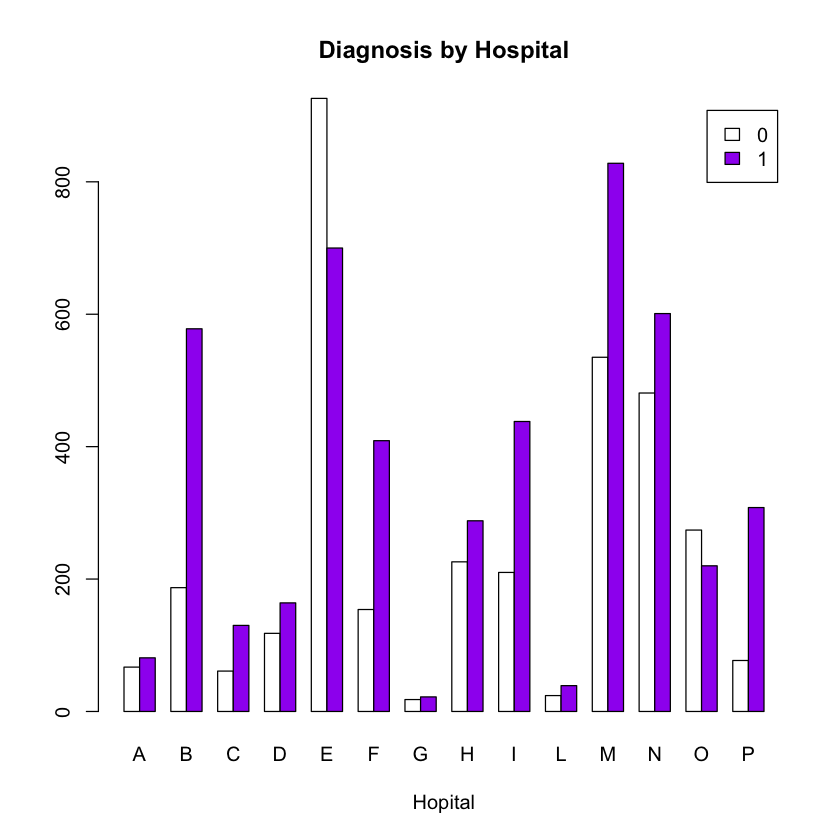

In [16]:
counts = table(data$Indicator_X,data$Hospital)
barplot(counts,main="Diagnosis by Hospital",
  xlab="Hopital", col=c("white","purple"),
  legend = rownames(counts), beside=TRUE)

from the bar chart, we know that M hospital is the hospital that complete the PSA accessment at the most amount and A hospital seems not to overuse the PSA accessment. However, we need to compare the ratio between 0 and 1, then we could get the ratio when the patient went to these hospitals and the probablity of being asked or suggested to do PSA accessment.   

In [17]:
aggregate(data$Indicator_X, by=list(data$Hospital), FUN=mean)

Group.1,x
A,0.5472973
B,0.7555556
C,0.6806283
D,0.5815603
E,0.4305043
F,0.7264654
G,0.5500000
H,0.5603113
I,0.6759259
L,0.6190476


Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”Warning message in Ops.factor(r, 2):
“‘^’ not meaningful for factors”ERROR while rich displaying an object: Error in quantile.default(resid): factors are not allowed

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)


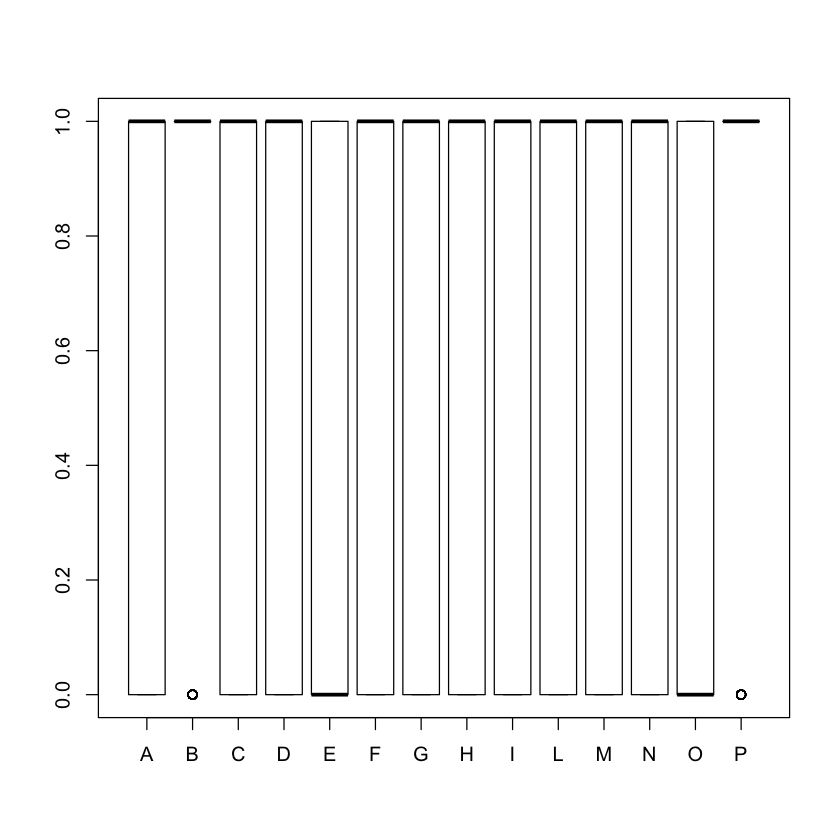

In [34]:
reg1 <- lm(Hospital~Indicator_X,data=data) 
	summary(reg1)
	
	with(data,plot(Hospital, Indicator_X))
	abline(reg1)

check the chart with regression line, we could see that Hospital A ,C, D,F,G , H, I, L, M, N are in the same group which means they are similar pattern; meanwhile, Hospital E and O are the same ;besides, Hospial B and P are the same condition.

We check the chart, and we could see that Hospial B is 0.7555556 and Hospialt P is 0.8000000. That is mean the two hospital could over suggested the patient to do PSA assessment.

Hospital E and O, for Hospital E is 0.4305043 and Hospial O is 0.4453441, which shows that the patients in the hospital receieved the PSA assessment less than other hospitals.

Hospial A is like the most hospital is at the value of 0.5472973 which is in the middle staus in these hospials.



We saw that M hospital is the hospital completed the the PSA accessment at the highest amount but its ration compared with other hospitals is at the average scale. 

Hospital A use the PSA accessment at the acceptalbe range for it still close to the regression line.  

In [49]:
hospitalA = data[data$Hospital == "A",]
nrow(hospitalA)

[1] 148

In [58]:
aggregate(hospitalA$Indicator_X, by=list(hospitalA$Year), FUN=mean)

Group.1,x
2016,0.5357143
2017,0.4666667
2018,0.6382979


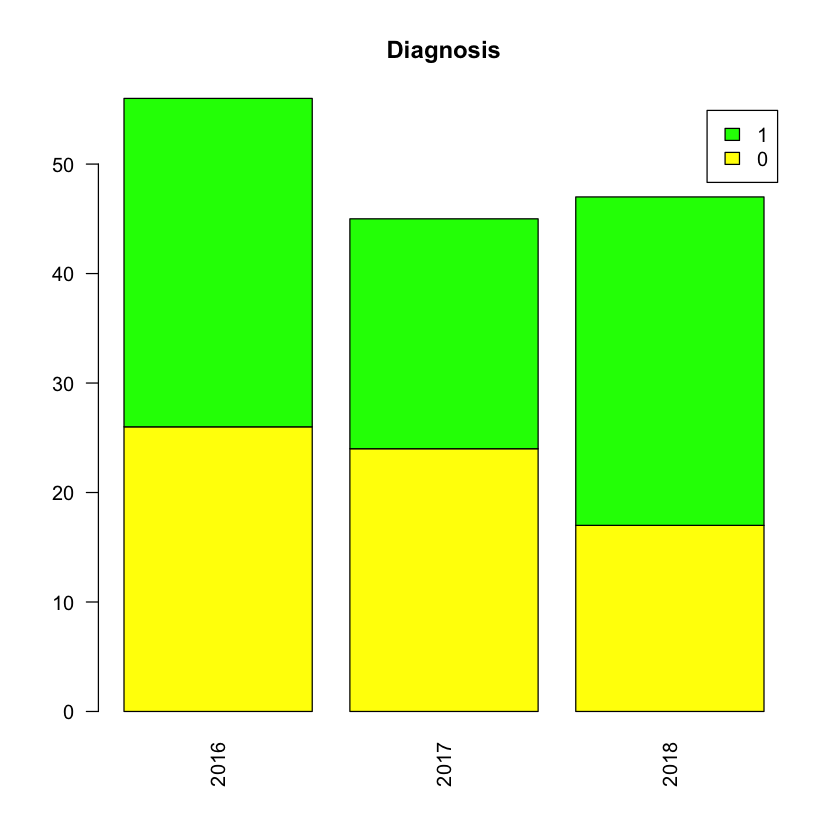

In [57]:
counts = table(hospitalA$Indicator_X,hospitalA$Year)
barplot(counts,main="Diagnosis",
  las = 2, col=c("yellow","green"),
  legend = rownames(counts))

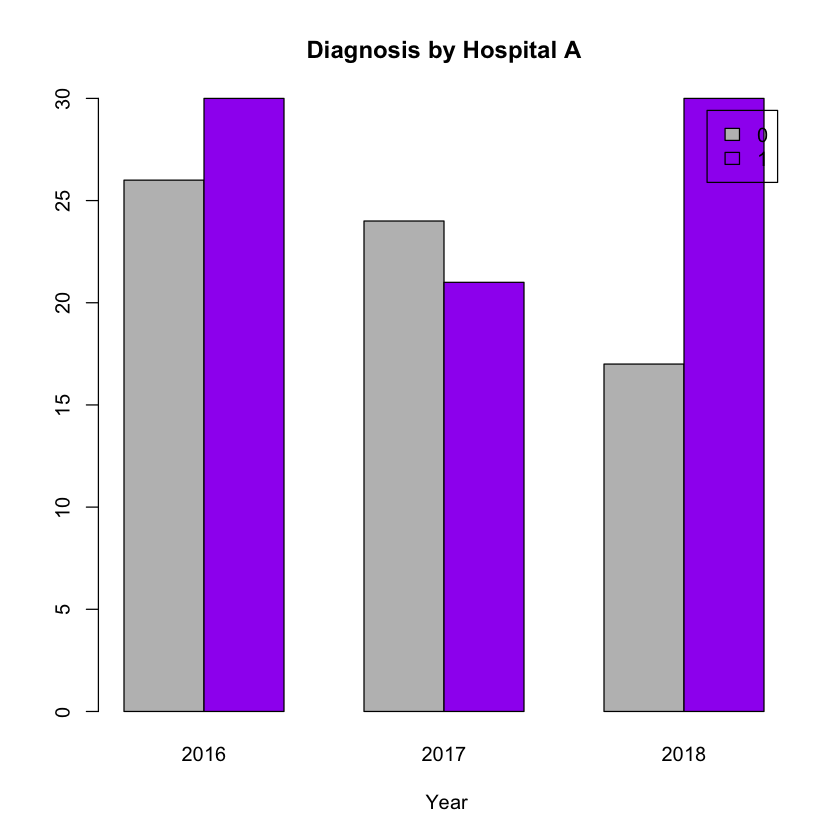

In [62]:
counts = table(hospitalA$Indicator_X,hospitalA$Year)
barplot(counts,main="Diagnosis by Hospital A",
  xlab=" Year", col=c("grey","purple"),
  legend = rownames(counts), beside=TRUE)

From the charts, we could see that Hospital A in 2018 increase the number of completing PSA assessment and that could require to note why it increases in recent year.  